In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
data = pd.read_csv('Adidas Vs Nike.csv')
data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19


In [3]:
data['Brand'] = pd.get_dummies(data['Brand'], drop_first=True)
data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,0,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,0,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,1,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,1,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,0,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,0,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,0,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,0,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,0,16995,0,0,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19


In [13]:
x = data[['Sale Price','Rating','Brand','Reviews']]
kmeans = KMeans(2)
kmeans.fit(x)
data['pred'] = kmeans.fit_predict(x)

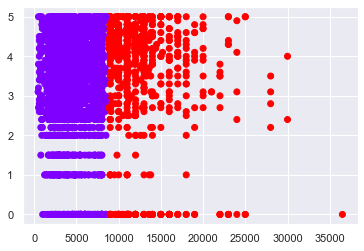

In [14]:
plt.scatter(data['Sale Price'], data['Rating'], c=data['pred'], cmap ="rainbow")

##  Checking optimal number of clusters using the elbow method

Text(0, 0.5, 'WCSS')

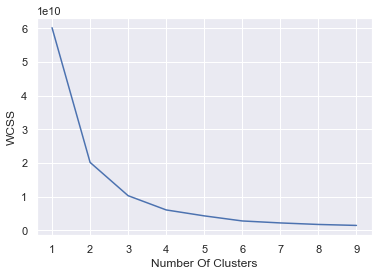

In [15]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
number_of_clusters = range(1,10)
plt.plot(number_of_clusters,wcss)
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')

##  Using the optimum obtained from the wcss

Text(0, 0.5, 'Rating')

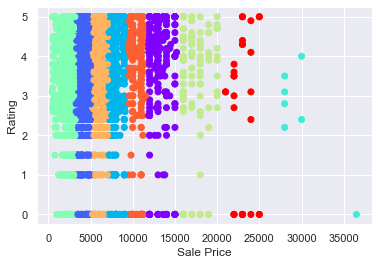

In [18]:
kmeans = KMeans(9)
kmeans.fit(x)
data['pred'] = kmeans.fit_predict(x)
plt.scatter(data['Sale Price'], data['Rating'], c=data['pred'], cmap ="rainbow")
plt.xlabel('Sale Price')
plt.ylabel('Rating')

###  Checking concerntration

Text(0, 0.5, 'Rating')

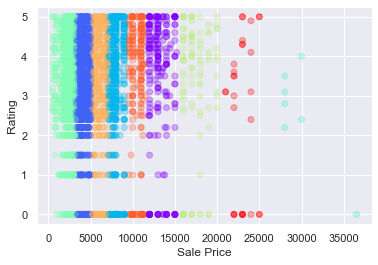

In [20]:
plt.scatter(data['Sale Price'], data['Rating'], c=data['pred'], cmap ="rainbow", alpha=0.3)
plt.xlabel('Sale Price')
plt.ylabel('Rating')

###  Standardizing the values

In [21]:
from sklearn import preprocessing

In [24]:
x_scaled = preprocessing.scale(x)

Text(0, 0.5, 'Rating')

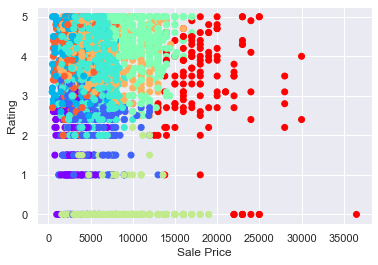

Text(0, 0.5, 'WCSS')

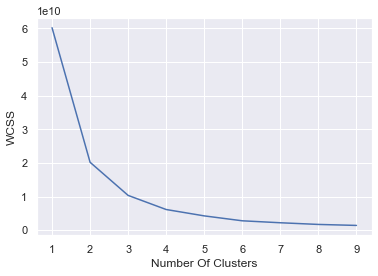

In [26]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
number_of_clusters = range(1,10)
plt.plot(number_of_clusters,wcss)
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'Sale Price')

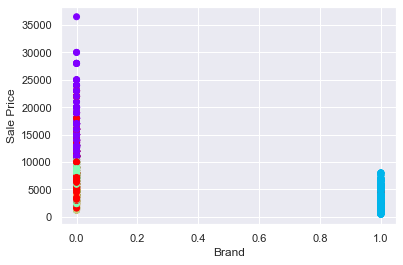

In [35]:
kmeans = KMeans(5)
kmeans.fit(x_scaled)
data['pred'] = kmeans.fit_predict(x_scaled)
plt.scatter(data['Brand'], data['Sale Price'], c=data['pred'], cmap ="rainbow")
plt.xlabel('Brand')
plt.ylabel('Sale Price')